In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
plt.style.use("ggplot")
from ggplot import *
%matplotlib inline

# N-Body Code Performance
The following analysis shows the performance analysis of a N-Body code, which was transformed by Mekong.

In [2]:
df = pd.read_csv("../victoria_n_body_2016-07-22.csv")
df = df.groupby(["gpus", "N"]).mean()
df = df.reset_index()
df["dep_res_time"] = df[["dep_res_creation_time", "dep_res_copy_time", "gpus"]].apply(lambda x : 0 if x[2] == 1 else x[0] + x[1], axis=1)
df["ratio_depres_usrkernel"] = df[["dep_res_time", "usr_kernel_time"]].apply(lambda x : x[0] / x[1], axis=1)
df["ratio_depres_copy"] = df[["dep_res_time", "dep_res_copy_time"]].apply(lambda x : x[1] / x[0], axis=1)
df["kernel_speedup"] = df.loc[:,["N", "usr_kernel_time"]].apply(lambda x: df[df.gpus == 1][df.N == x[0]].loc[:,["usr_kernel_time"]].iloc[0,0] / x[1], axis=1)
df["total_time"] = df[["usr_htod_memcpy_time", "usr_kernel_time", "usr_dtoh_memcpy_time"]].apply(lambda x : x[0] + x[1] + x[2], axis=1)
df["total_speedup"] = df.loc[:,["N", "total_time"]].apply(lambda x: df[df.gpus == 1][df.N == x[0]].loc[:,["total_time"]].iloc[0,0] / x[1], axis=1)
df["kernel-depres"] = df[["dep_res_time", "usr_kernel_time"]].apply(lambda x : x[1] - x[0], axis=1)
df["rel_dep_res_creation_time"] = df[["dep_res_time", "dep_res_creation_time"]].apply(lambda x : x[1] / x[0], axis=1)
df.head()

/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,gpus,N,usr_htod_memcpy_time,usr_dtoh_memcpy_time,usr_kernel_time,dep_res_creation_time,dep_res_copy_time,arg_acc_time,lin_time,dep_res_time,ratio_depres_usrkernel,ratio_depres_copy,kernel_speedup,total_time,total_speedup,kernel-depres,rel_dep_res_creation_time
0,1,1024,0.000068,0.000079,1.332068,NaN,NaN,NaN,NaN,0,0,NaN,1,1.332215,1,1.332068,NaN
1,1,10240,0.000156,0.000212,13.089680,NaN,NaN,NaN,NaN,0,0,NaN,1,13.090048,1,13.089680,NaN
2,1,20480,0.000212,0.000299,52.233520,NaN,NaN,NaN,NaN,0,0,NaN,1,52.234031,1,52.233520,NaN
3,1,30720,0.000279,0.000429,115.935400,NaN,NaN,NaN,NaN,0,0,NaN,1,115.936108,1,115.935400,NaN
4,1,40960,0.000353,0.000494,203.993200,NaN,NaN,NaN,NaN,0,0,NaN,1,203.994047,1,203.993200,NaN


[10240, 20480, 30720, 40960, 51200]


/usr/local/lib/python2.7/dist-packages/matplotlib-1.5.1_1670.gc03262a-py2.7-linux-x86_64.egg/matplotlib/__init__.py:898: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


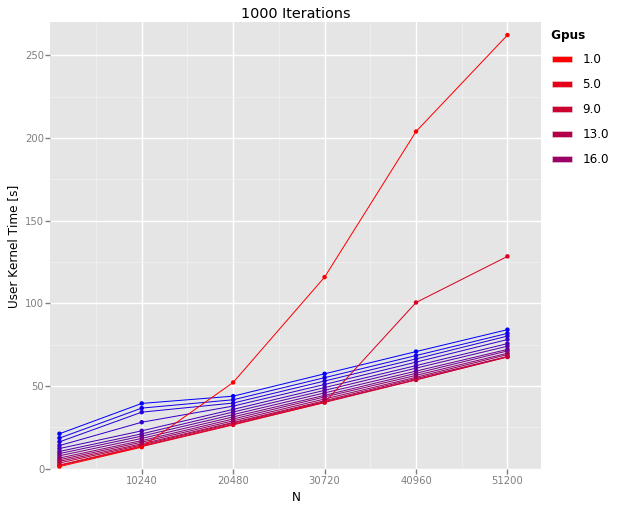

<ggplot: (8751586316489)>

In [3]:
xn = [i*1024*10 for i in range(1,6)]
print xn
p = ggplot(aes(x="N", y="usr_kernel_time", color="gpus"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("User Kernel Time [s]") +\
xlim(0, 55000) + ylim(0, 270) + ggtitle("1000 Iterations") +\
scale_x_continuous(breaks=xn)
p

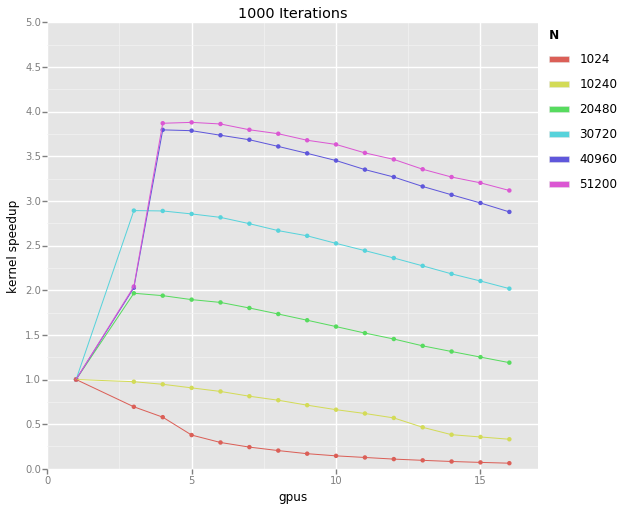

<ggplot: (8751586309289)>

In [4]:
p = ggplot(aes(x="gpus", y="kernel_speedup", color="N"), data=df) +\
geom_point(size=20) + geom_line() + ylab("kernel speedup") +\
scale_color_gradient(low="red", high="blue") +\
xlim(0, 17) + ylim(0, 5) + ggtitle("1000 Iterations")
p

## Memcpy Performance
### Host to Device

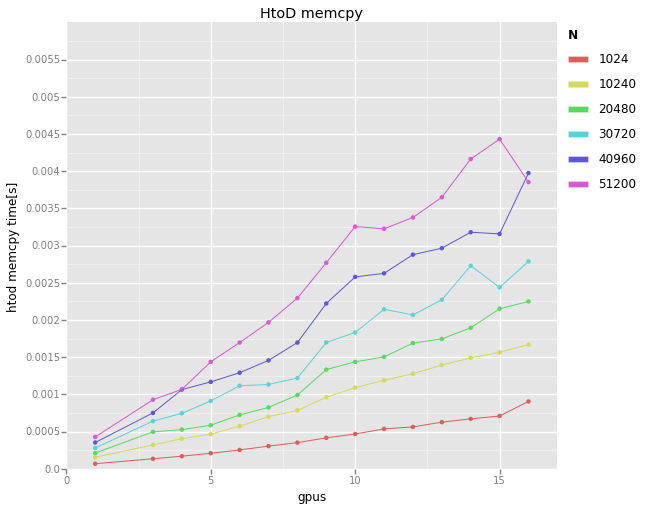

<ggplot: (8751585711125)>

In [5]:
p = ggplot(aes(x="gpus", y="usr_htod_memcpy_time", color="N"), data=df) +\
geom_point(size=20) + geom_line() + ylab("htod memcpy time[s]") +\
scale_color_gradient(low="red", high="blue") +\
xlim(0, 17) + ylim(0, 0.006) + ggtitle("HtoD memcpy")
p

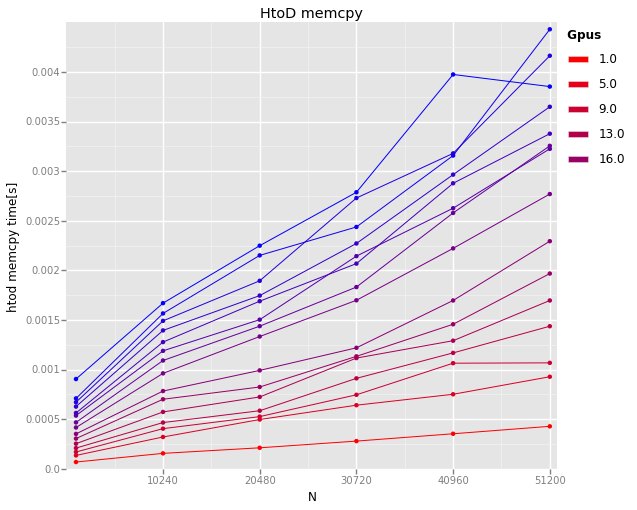

<ggplot: (8751585605125)>

In [6]:
p = ggplot(aes(x="N", y="usr_htod_memcpy_time", color="gpus"), data=df) +\
geom_point(size=20) + geom_line() + ylab("htod memcpy time[s]") +\
scale_color_gradient(low="red", high="blue") +\
xlim(0, 52000) + ylim(0, 0.0045) + ggtitle("HtoD memcpy") +\
scale_x_continuous(breaks=xn)
p

### Device to Host

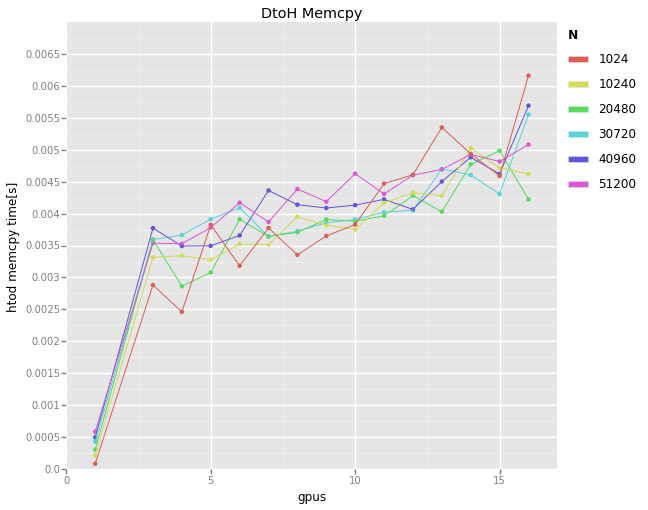

<ggplot: (8751585679049)>

In [7]:
p = ggplot(aes(x="gpus", y="usr_dtoh_memcpy_time", color="N"), data=df) +\
geom_point(size=20) + geom_line() + ylab("htod memcpy time[s]") +\
scale_color_gradient(low="red", high="blue") +\
xlim(0, 17) + ylim(0, 0.007) + ggtitle("DtoH Memcpy")
p

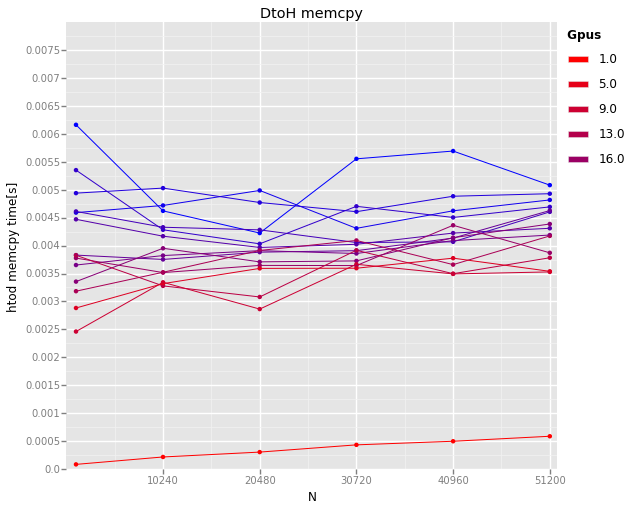

<ggplot: (8751583652709)>

In [8]:
p = ggplot(aes(x="N", y="usr_dtoh_memcpy_time", color="gpus"), data=df) +\
geom_point(size=20) + geom_line() + ylab("htod memcpy time[s]") +\
scale_color_gradient(low="red", high="blue") +\
xlim(0, 52000) + ylim(0, 0.008) + ggtitle("DtoH memcpy") +\
scale_x_continuous(breaks=xn)
p

## Dependency Resolution Analysis

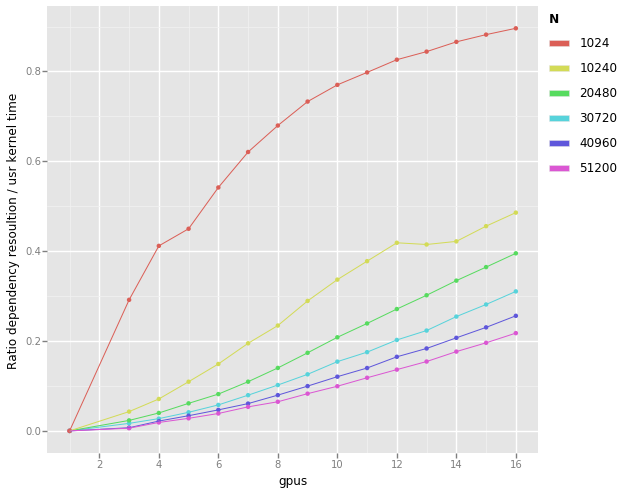

<ggplot: (8751583622193)>

In [9]:
p = ggplot(aes(x="gpus", y="ratio_depres_usrkernel", color="N"), data=df) +\
geom_point(size=20) + geom_line() + ylab("Ratio dependency resoultion / usr kernel time") +\
scale_color_gradient(low="red", high="blue")
#xlim(0, 17) + ylim(0, 1) + ggtitle("with compiler optimizations on runtime")
p

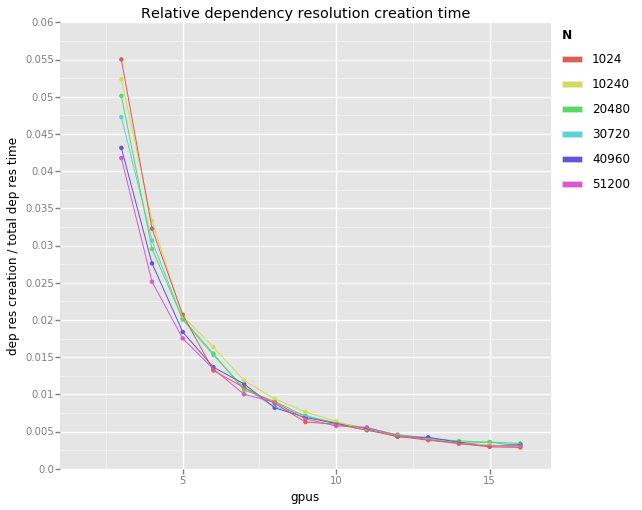

<ggplot: (8751583692401)>

In [10]:
p = ggplot(aes(x="gpus", y="rel_dep_res_creation_time", color="N"), data=df) +\
geom_point(size=20) + geom_line() + ylab("dep res creation / total dep res time") +\
scale_color_gradient(low="red", high="blue") +\
xlim(1, 17) + ylim(0, 0.06) + ggtitle("Relative dependency resolution creation time")
p

## Performance Overview

In [11]:
dummy = df[(df.N == 51200)].loc[:,["gpus","usr_dtoh_memcpy_time","usr_htod_memcpy_time", "kernel-depres","dep_res_copy_time", "dep_res_creation_time"]]
dummy.columns = ["GPUs", "Device to Host", "Host to Device", "Kernel", "Communication", "Dependency Calculation"]
dummy.head()

,GPUs,Device to Host,Host to Device,Kernel,Communication,Dependency Calculation
5,1,0.000583,0.000428,262.329600,NaN,NaN
11,3,0.003539,0.000928,127.708955,0.742097,0.032349
17,4,0.003528,0.001068,66.506989,1.240462,0.031989
23,5,0.003782,0.001437,65.716308,1.857866,0.033146
29,6,0.004173,0.001697,65.291360,2.594686,0.035274


Creating two barplots...
len of values = 15


Text(0.5,0.98,u'N Body Code')

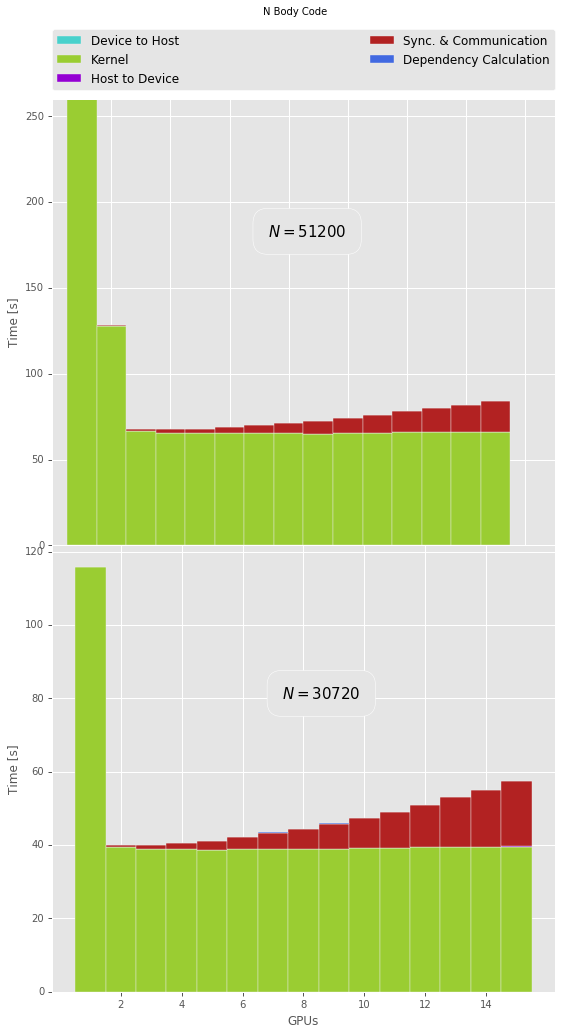

In [12]:
plt.style.use("ggplot")
dummy = df[(df.N == 51200)].loc[:,["gpus","usr_dtoh_memcpy_time","usr_htod_memcpy_time", "kernel-depres","dep_res_copy_time", "dep_res_creation_time"]]
dummy.columns = ["GPUs", "Device to Host", "Host to Device", "Kernel", "Communication", "Dependency Calculation"]

sm = ScalarMappable()
sm.set_clim(vmin = 0, vmax = 4)
cmName = "viridis"
sm.set_cmap(cmName)
width = 1
lw = 0.4
fig = plt.figure(figsize=(9,16))
ax = fig.add_subplot(211)

#colors = ["seagreen", "brown", "darkorange", "indigo"]
colors = ["yellowgreen", "darkviolet", "mediumturquoise", "firebrick", "royalblue"]

##### FIRST BARPLOT
print "Creating two barplots..."
print "len of values =", len(dummy["Device to Host"].values)
numGpus = 15
ax.bar(range(1,numGpus + 1), dummy["Device to Host"].values, align="center", width=width,\
      label="Device to Host", linewidth=lw, color=colors[2])
cumu = dummy["Device to Host"].values
ax.bar(range(1,numGpus + 1), dummy["Kernel"].values, width = width, align="center",\
       label="Kernel", linewidth=lw, color=colors[0], bottom=cumu)
cumu += dummy["Kernel"].values
ax.bar(range(1,numGpus + 1), dummy["Host to Device"].values, align="center", width=width,\
       label="Host to Device", bottom = cumu, linewidth=lw, color=colors[1])
cumu += dummy["Host to Device"].values
ax.bar(range(1,numGpus + 1), dummy["Communication"].values, align="center", width=width,\
       label="Sync. & Communication", bottom = cumu, linewidth=lw, color=colors[3])
cumu += dummy["Communication"]
ax.bar(range(1,numGpus + 1), dummy["Dependency Calculation"].values, align="center", width=width,\
       label="Dependency Calculation", bottom = cumu, linewidth=lw, color=colors[4])

ax.get_xaxis().set_ticks_position("bottom")
ax.get_yaxis().set_ticks_position("left")

ax.set_xlim(0,17)
ax.set_ylim(0, 260)
ax.set_ylabel("Time [s]")
ax.set_xticks(range(2,17,2))
ax.text(7.3, 180, "$N=51200$", fontsize=15, bbox={"facecolor":ax.get_facecolor(),"boxstyle":"round", "edgecolor":"white", "pad":1})

#### SECOND BARPLOT

dummy = df[(df.N == 30720)].loc[:,["gpus","usr_dtoh_memcpy_time","usr_htod_memcpy_time", "kernel-depres","dep_res_copy_time", "dep_res_creation_time"]]
dummy.columns = ["GPUs", "Device to Host", "Host to Device", "Kernel", "Communication", "Dependency Calculation"]

ax1 = fig.add_subplot(212)

numGpus = 15
ax1.bar(range(1,numGpus + 1), dummy["Device to Host"].values, align="center", width=width,\
      label="Device to Host", linewidth=lw, color=colors[2])
cumu = dummy["Device to Host"].values
ax1.bar(range(1,numGpus + 1), dummy["Kernel"].values, width = width, align="center",\
       label="Kernel", linewidth=lw, color=colors[0], bottom=cumu)
cumu += dummy["Kernel"].values
ax1.bar(range(1,numGpus + 1), dummy["Host to Device"].values, align="center", width=width,\
       label="Host to Device", bottom = cumu, linewidth=lw, color=colors[1])
cumu += dummy["Host to Device"].values
ax1.bar(range(1,numGpus + 1), dummy["Communication"].values, align="center", width=width,\
       label="Sync. & Communication", bottom = cumu, linewidth=lw, color=colors[3])
cumu += dummy["Communication"]
ax1.bar(range(1,numGpus + 1), dummy["Dependency Calculation"].values, align="center", width=width,\
       label="Dependency Calculation", bottom = cumu, linewidth=lw, color=colors[4])

ax1.get_xaxis().set_ticks_position("bottom")
ax1.get_yaxis().set_ticks_position("left")
ax1.grid(which="minor")
#ax1.set_xlim(0,17)
#ax1.set_ylim(0, 40)
#ax1.set_yticks(range(0,40,10))
ax1.set_ylabel("Time [s]")
ax1.set_xlabel("GPUs")
ax1.set_xticks(range(2,numGpus + 1,2))

ax1.text(7.3, 80, "$N=30720$", fontsize=15, bbox={"facecolor":ax1.get_facecolor(),"boxstyle":"round", "edgecolor":"white", "pad":1})

##### BACKGROUND IMAGE
legend = ax.legend(bbox_to_anchor=(0,1.02,1,0.102), loc=3, ncol=2, mode="expand",borderaxespad=0)
legend.get_frame().set_edgecolor("white")

#plotlim = ax.get_xlim() + ax.get_ylim()
#ax.imshow([[1, 1], [0, 0]], cmap=plt.cm.Greys,vmin= -0.5, vmax= 4, interpolation="bicubic", extent=plotlim, aspect="auto")
#plotlim = ax1.get_xlim() + ax1.get_ylim()
#ax1.imshow([[1, 1], [0, 0]], cmap=plt.cm.Greys,vmin= -0.5, vmax= 4, interpolation="bicubic", extent=plotlim, aspect="auto")

fig.subplots_adjust(hspace=0,top=0.9)#, right=0.85)
fig.suptitle("N Body Code")

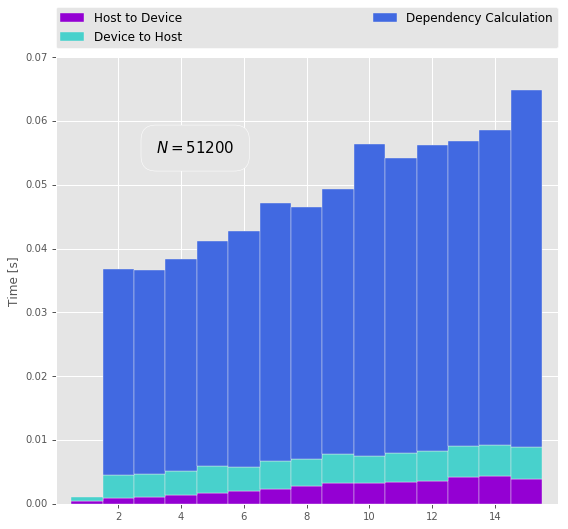

In [13]:
dummy = df[(df.N == 51200)].loc[:,["gpus","usr_dtoh_memcpy_time","usr_htod_memcpy_time", "kernel-depres","dep_res_copy_time", "dep_res_creation_time"]]
dummy.columns = ["GPUs", "Device to Host", "Host to Device", "Kernel", "Communication", "Dependency Calculation"]

sm = ScalarMappable()
sm.set_clim(vmin = 0, vmax = 4)
cmName = "viridis"
sm.set_cmap(cmName)
width = 1
lw = 0.4

plt.style.use("ggplot")
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111)
#colors = ["seagreen", "brown", "darkorange", "indigo"]
colors = ["yellowgreen", "darkviolet", "mediumturquoise", "firebrick", "royalblue"]

numGpus = 15
ax.bar(range(1,numGpus + 1), dummy["Host to Device"].values, align="center", width=width,\
       label="Host to Device",linewidth=lw, color=colors[1])
cumu = dummy["Host to Device"].values
ax.bar(range(1,numGpus + 1), dummy["Device to Host"].values, align="center", width=width,\
      label="Device to Host", bottom=cumu,linewidth=lw, color=colors[2])
cumu += dummy["Device to Host"].values

ax.bar(range(1,numGpus + 1), dummy["Dependency Calculation"].values, align="center", width=width,\
       label="Dependency Calculation", bottom = cumu, linewidth=lw, color=colors[4])

ax.get_xaxis().set_ticks_position("bottom")
ax.get_yaxis().set_ticks_position("left")

ax.set_xlim(0, numGpus + 1)
ax.set_ylim(0, 0.07)
ax.set_ylabel("Time [s]")
ax.set_xticks(range(2,numGpus+1,2))
ax.legend()
ax.text(3.2, 0.055, "$N=51200$", fontsize=15, bbox={"facecolor":ax.get_facecolor(),"boxstyle":"round", "edgecolor":"white", "pad":1})

# LEGEND
legend = ax.legend(bbox_to_anchor=(0,1.02,1,0.102), loc=3, ncol=2, mode="expand",borderaxespad=0)
legend.get_frame().set_edgecolor("white")

# N Body Code Revisited on Victoria
Blocksize now = 1024 and only 50 iterations were calculated. Moreover the limit of N was raised.

In [2]:
df = pd.read_csv("../victoria_n_body_2016-08-20.csv")
df = df.groupby(["gpus", "N"]).mean()
df = df.reset_index()
df["dep_res_time"] = df[["dep_res_creation_time", "dep_res_copy_time", "gpus"]].apply(lambda x : 0 if x[2] == 1 else x[0] + x[1], axis=1)
df["ratio_depres_usrkernel"] = df[["dep_res_time", "usr_kernel_time"]].apply(lambda x : x[0] / x[1], axis=1)
df["ratio_depres_copy"] = df[["dep_res_time", "dep_res_copy_time"]].apply(lambda x : x[1] / x[0], axis=1)
df["total_time"] = df[["usr_htod_memcpy_time", "usr_kernel_time", "usr_dtoh_memcpy_time"]].apply(lambda x : x[0] + x[1] + x[2], axis=1)
df["kernel-depres"] = df[["dep_res_time", "usr_kernel_time"]].apply(lambda x : x[1] - x[0], axis=1)
df["rel_dep_res_creation_time"] = df[["dep_res_time", "dep_res_creation_time"]].apply(lambda x : x[1] / x[0], axis=1)
df["overhead"] = df[["dep_res_time","total_time"]].apply(lambda x: x[0] / x[1], axis=1)
df["total_speedup"] = df.loc[:,["N", "total_time"]].apply(lambda x: df[df.gpus == 1][df.N == x[0]].loc[:,["total_time"]].iloc[0,0] / x[1] if not df[df.gpus == 1][df.N == x[0]].loc[:,["total_time"]].empty else np.NaN, axis=1)
df["kernel_speedup"] = df.loc[:,["N", "usr_kernel_time"]].apply(lambda x: df[df.gpus == 1][df.N == x[0]].loc[:,["usr_kernel_time"]].iloc[0,0] / x[1] if not df[df.gpus == 1][df.N == x[0]].loc[:,["total_time"]].empty else np.NaN, axis=1)

df[df.gpus == 1].head(10)

/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,gpus,N,T,usr_htod_memcpy_time,usr_dtoh_memcpy_time,usr_kernel_time,dep_res_creation_time,dep_res_copy_time,arg_acc_time,lin_time,blocksize,dep_res_time,ratio_depres_usrkernel,ratio_depres_copy,total_time,kernel-depres,rel_dep_res_creation_time,overhead,total_speedup,kernel_speedup
0,1,16384,50,0.000610,0.000226,1.364923,NaN,NaN,NaN,NaN,1024,0,0,NaN,1.365759,1.364923,NaN,0,1,1
1,1,28672,50,0.000591,0.000346,4.226703,NaN,NaN,NaN,NaN,1024,0,0,NaN,4.227640,4.226703,NaN,0,1,1
2,1,40960,50,0.001140,0.000516,6.096093,NaN,NaN,NaN,NaN,1024,0,0,NaN,6.097749,6.096093,NaN,0,1,1
3,1,53248,50,0.001473,0.000643,8.007853,NaN,NaN,NaN,NaN,1024,0,0,NaN,8.009969,8.007853,NaN,0,1,1
4,1,65536,50,0.001812,0.000808,14.304700,NaN,NaN,NaN,NaN,1024,0,0,NaN,14.307320,14.304700,NaN,0,1,1
5,1,77824,50,0.001741,0.000959,17.284500,NaN,NaN,NaN,NaN,1024,0,0,NaN,17.287201,17.284500,NaN,0,1,1
6,1,90112,50,0.002387,0.001001,26.023867,NaN,NaN,NaN,NaN,1024,0,0,NaN,26.027254,26.023867,NaN,0,1,1
7,1,102400,50,0.002782,0.001109,30.015600,NaN,NaN,NaN,NaN,1024,0,0,NaN,30.019492,30.015600,NaN,0,1,1
8,1,114688,50,0.003132,0.001171,41.096267,NaN,NaN,NaN,NaN,1024,0,0,NaN,41.100569,41.096267,NaN,0,1,1
9,1,126976,50,0.002964,0.001350,46.378033,NaN,NaN,NaN,NaN,1024,0,0,NaN,46.382347,46.378033,NaN,0,1,1


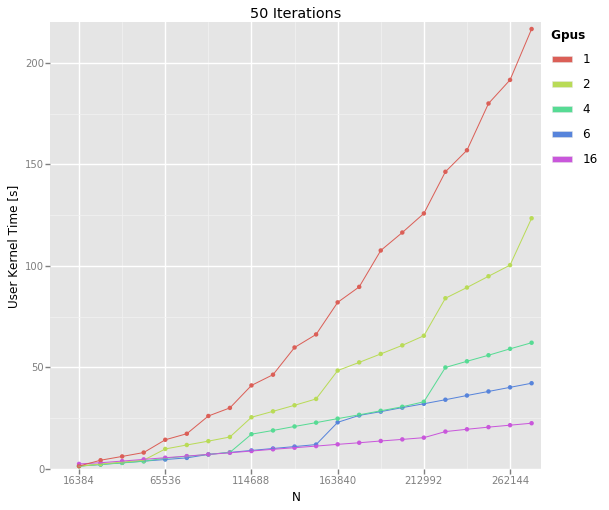

<ggplot: (8751585774317)>

In [15]:
xn = [i*12288 + 16384 for i in range(0,(278528-16384)/12288+1,4)]
#print xn
p = ggplot(aes(x="N", y="usr_kernel_time", color="gpus"), data=df[(df.gpus == 1) | (df.gpus == 4) | (df.gpus == 2) | (df.gpus == 16) | (df.gpus == 6)]) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("User Kernel Time [s]") +\
xlim(0, 280000) + ylim(0, 220) + ggtitle("50 Iterations") +\
scale_x_continuous(breaks=xn)
p

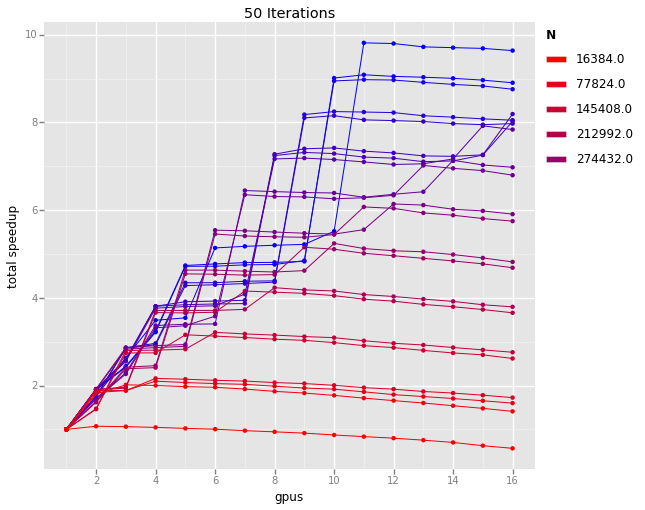

<ggplot: (8732869515645)>

In [5]:
p = ggplot(aes(x="gpus", y="total_speedup", color="N"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("total speedup") + ggtitle("50 Iterations")
p

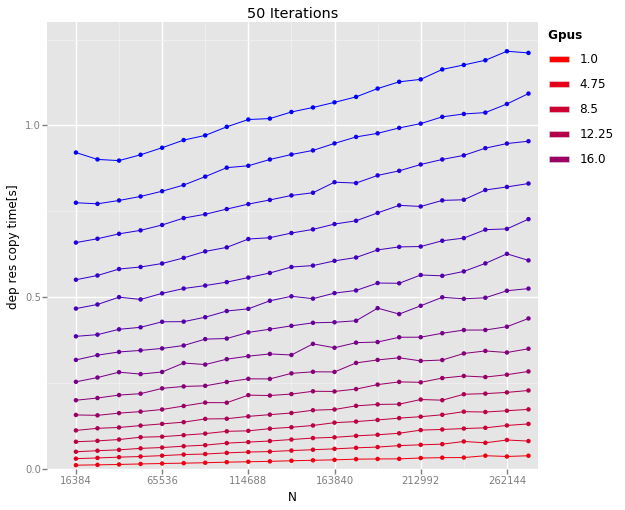

<ggplot: (8751585711205)>

In [16]:
xn = [i*12288 + 16384 for i in range(0,(278528-16384)/12288+1,4)]
#print xn
p = ggplot(aes(x="N", y="dep_res_copy_time", color="gpus"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("dep res copy time[s]") +\
xlim(0, 280000) + ylim(0, 1.3) + ggtitle("50 Iterations") +\
scale_x_continuous(breaks=xn)
p

Creating two barplots...
len of values = 16


Text(0.5,0.98,u'N Body Code')

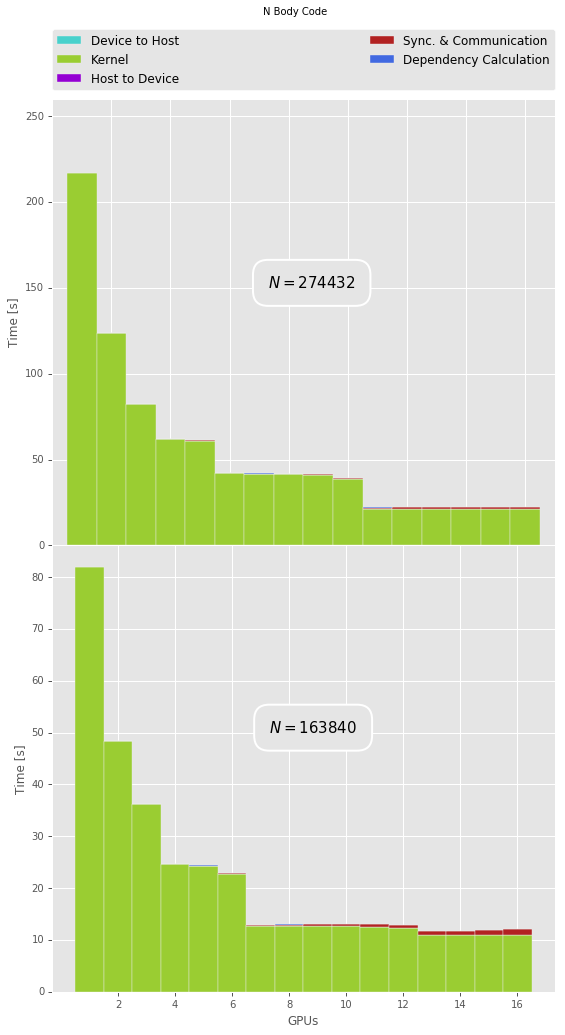

In [17]:
plt.style.use("ggplot")
currN = 262144 + 12288
dummy = df[(df.N == currN)].loc[:,["gpus","usr_dtoh_memcpy_time","usr_htod_memcpy_time", "kernel-depres","dep_res_copy_time", "dep_res_creation_time"]]
dummy.columns = ["GPUs", "Device to Host", "Host to Device", "Kernel", "Communication", "Dependency Calculation"]

sm = ScalarMappable()
sm.set_clim(vmin = 0, vmax = 4)
cmName = "viridis"
sm.set_cmap(cmName)
width = 1
lw = 0.4
fig = plt.figure(figsize=(9,16))
ax = fig.add_subplot(211)

#colors = ["seagreen", "brown", "darkorange", "indigo"]
colors = ["yellowgreen", "darkviolet", "mediumturquoise", "firebrick", "royalblue"]

##### FIRST BARPLOT
print "Creating two barplots..."
print "len of values =", len(dummy["Device to Host"].values)
numGpus = 16
ax.bar(range(1,numGpus + 1), dummy["Device to Host"].values, align="center", width=width,\
      label="Device to Host", linewidth=lw, color=colors[2])
cumu = dummy["Device to Host"].values
ax.bar(range(1,numGpus + 1), dummy["Kernel"].values, width = width, align="center",\
       label="Kernel", linewidth=lw, color=colors[0], bottom=cumu)
cumu += dummy["Kernel"].values
ax.bar(range(1,numGpus + 1), dummy["Host to Device"].values, align="center", width=width,\
       label="Host to Device", bottom = cumu, linewidth=lw, color=colors[1])
cumu += dummy["Host to Device"].values
ax.bar(range(1,numGpus + 1), dummy["Communication"].values, align="center", width=width,\
       label="Sync. & Communication", bottom = cumu, linewidth=lw, color=colors[3])
cumu += dummy["Communication"]
ax.bar(range(1,numGpus + 1), dummy["Dependency Calculation"].values, align="center", width=width,\
       label="Dependency Calculation", bottom = cumu, linewidth=lw, color=colors[4])

ax.get_xaxis().set_ticks_position("bottom")
ax.get_yaxis().set_ticks_position("left")

ax.set_xlim(0,17)
ax.set_ylim(0, 260)
ax.set_ylabel("Time [s]")
ax.set_xticks(range(2,17,2))
ax.text(7.3, 150, "$N="+str(currN)+"$", fontsize=15, bbox={"facecolor":ax.get_facecolor(),"boxstyle":"round", "edgecolor":"white", "pad":1,"lw":2})

#### SECOND BARPLOT
currN = 163840
dummy = df[(df.N == currN)].loc[:,["gpus","usr_dtoh_memcpy_time","usr_htod_memcpy_time", "kernel-depres","dep_res_copy_time", "dep_res_creation_time"]]
dummy.columns = ["GPUs", "Device to Host", "Host to Device", "Kernel", "Communication", "Dependency Calculation"]

ax1 = fig.add_subplot(212)

numGpus = 16
ax1.bar(range(1,numGpus + 1), dummy["Device to Host"].values, align="center", width=width,\
      label="Device to Host", linewidth=lw, color=colors[2])
cumu = dummy["Device to Host"].values
ax1.bar(range(1,numGpus + 1), dummy["Kernel"].values, width = width, align="center",\
       label="Kernel", linewidth=lw, color=colors[0], bottom=cumu)
cumu += dummy["Kernel"].values
ax1.bar(range(1,numGpus + 1), dummy["Host to Device"].values, align="center", width=width,\
       label="Host to Device", bottom = cumu, linewidth=lw, color=colors[1])
cumu += dummy["Host to Device"].values
ax1.bar(range(1,numGpus + 1), dummy["Communication"].values, align="center", width=width,\
       label="Sync. & Communication", bottom = cumu, linewidth=lw, color=colors[3])
cumu += dummy["Communication"]
ax1.bar(range(1,numGpus + 1), dummy["Dependency Calculation"].values, align="center", width=width,\
       label="Dependency Calculation", bottom = cumu, linewidth=lw, color=colors[4])

ax1.get_xaxis().set_ticks_position("bottom")
ax1.get_yaxis().set_ticks_position("left")
ax1.grid(which="minor")
#ax1.set_xlim(0,17)
#ax1.set_ylim(0, 40)
#ax1.set_yticks(range(0,40,10))
ax1.set_ylabel("Time [s]")
ax1.set_xlabel("GPUs")
ax1.set_xticks(range(2,numGpus + 1,2))

ax1.text(7.3, 50, "$N="+str(currN)+"$", fontsize=15, bbox={"facecolor":ax1.get_facecolor(),"boxstyle":"round", "edgecolor":"white", "pad":1,"lw":2})

##### BACKGROUND IMAGE
legend = ax.legend(bbox_to_anchor=(0,1.02,1,0.102), loc=3, ncol=2, mode="expand",borderaxespad=0)
legend.get_frame().set_edgecolor("white")

#plotlim = ax.get_xlim() + ax.get_ylim()
#ax.imshow([[1, 1], [0, 0]], cmap=plt.cm.Greys,vmin= -0.5, vmax= 4, interpolation="bicubic", extent=plotlim, aspect="auto")
#plotlim = ax1.get_xlim() + ax1.get_ylim()
#ax1.imshow([[1, 1], [0, 0]], cmap=plt.cm.Greys,vmin= -0.5, vmax= 4, interpolation="bicubic", extent=plotlim, aspect="auto")

fig.subplots_adjust(hspace=0,top=0.9)#, right=0.85)
fig.suptitle("N Body Code")

[16384, 65536, 114688, 163840, 212992, 262144]


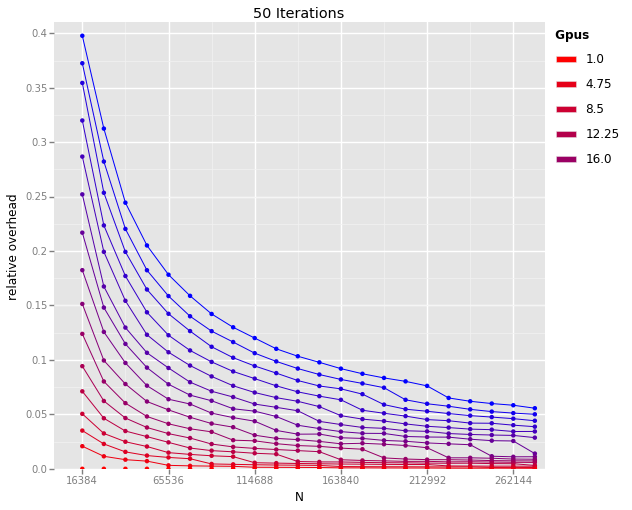

<ggplot: (8760532620417)>

In [32]:
xn = [i*12288 + 16384 for i in range(0,(278528-16384)/12288+1,4)]
print xn
p = ggplot(aes(x="N", y="overhead", color="gpus"), data=df) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("relative overhead") +\
xlim(0, 280000) + ylim(0, 0.41) + ggtitle("50 Iterations") +\
scale_x_continuous(breaks=xn)
p

## Zoom for 4 Gpus
just a backup code

    df4gpus = df[(df.N >= 409600) & (df.N < 460000) & (df.gpus == 4)]
    df4gpus = pd.melt(df4gpus, id_vars=["gpus", "N"], value_vars=["usr_htod_memcpy_time",\
                                                              "usr_kernel_time",\
                                                              "usr_dtoh_memcpy_time",\
                                                              "dep_res_creation_time",\
                                                              "dep_res_copy_time",\
                                                              "arg_acc_time",\
                                                              "lin_time",\
                                                              "dep_res_time",\
                                                              "ratio_depres_usrkernel",\
                                                              "ratio_depres_copy",\
                                                              "total_time",\
                                                              "kernel-depres",\
                                                              "rel_dep_res_creation_time"])
    df4gpus.head()

    p = ggplot(aes(x="N", y="value"), data=df4gpus) +\
    geom_point(size=20) + geom_line() + facet_wrap("variable", ncol=2) +\
    scale_color_gradient(low="red", high="blue") + ylab("dep res execution time[s]") 
    xlim(0, 38000) + ylim(0, 1.8)
    scale_x_continuous(breaks=[1024,4096,8192,12288,16384,20480,24576,28672,32768,36864]) +\
    p.draw()
    fig = plt.gcf()
    fig = fig.set_size_inches(14,20)
    plt.show()

# On Creek

In [18]:
df_creek = pd.read_csv("../creek_n_body_T1_2016-08-04.csv")
df_creek = df_creek.groupby(["gpus", "N"]).mean()
df_creek = df_creek.reset_index()
df_creek["dep_res_time"] = df_creek[["dep_res_creation_time", "dep_res_copy_time", "gpus"]].apply(lambda x : 0 if x[2] == 1 else x[0] + x[1], axis=1)
df_creek["ratio_depres_usrkernel"] = df_creek[["dep_res_time", "usr_kernel_time"]].apply(lambda x : x[0] / x[1], axis=1)
df_creek["ratio_depres_copy"] = df_creek[["dep_res_time", "dep_res_copy_time"]].apply(lambda x : x[1] / x[0], axis=1)
df_creek["total_time"] = df_creek[["usr_htod_memcpy_time", "usr_kernel_time", "usr_dtoh_memcpy_time"]].apply(lambda x : x[0] + x[1] + x[2], axis=1)
df_creek["kernel-depres"] = df_creek[["dep_res_time", "usr_kernel_time"]].apply(lambda x : x[1] - x[0], axis=1)
df_creek["rel_dep_res_creation_time"] = df_creek[["dep_res_time", "dep_res_creation_time"]].apply(lambda x : x[1] / x[0], axis=1)

df_creek["total_speedup"] = df_creek.loc[:,["N", "total_time"]].apply(lambda x: df_creek[df_creek.gpus == 1][df_creek.N == x[0]].loc[:,["total_time"]].iloc[0,0] / x[1] if not df_creek[df_creek.gpus == 1][df_creek.N == x[0]].loc[:,["total_time"]].empty else np.NaN, axis=1)
df_creek["kernel_speedup"] = df_creek.loc[:,["N", "usr_kernel_time"]].apply(lambda x: df_creek[df_creek.gpus == 1][df_creek.N == x[0]].loc[:,["usr_kernel_time"]].iloc[0,0] / x[1] if not df_creek[df_creek.gpus == 1][df_creek.N == x[0]].loc[:,["total_time"]].empty else np.NaN, axis=1)

df_creek.head()

,gpus,N,T,usr_htod_memcpy_time,usr_dtoh_memcpy_time,usr_kernel_time,dep_res_creation_time,dep_res_copy_time,arg_acc_time,lin_time,dep_res_time,ratio_depres_usrkernel,ratio_depres_copy,total_time,kernel-depres,rel_dep_res_creation_time,total_speedup,kernel_speedup
0,2,16384,1,0.000935,0.004980,0.039139,0.012592,0.000021,0.016978,0.016880,0.012614,0.322281,0.001696,0.045054,0.026525,0.998304,NaN,NaN
1,2,17408,1,0.001290,0.006664,0.042667,0.014639,0.000034,0.020043,0.019947,0.014673,0.343891,0.002296,0.050621,0.027994,0.997704,NaN,NaN
2,2,18432,1,0.000724,0.005887,0.043857,0.014205,0.000028,0.019330,0.019229,0.014233,0.324524,0.001951,0.050467,0.029624,0.998049,NaN,NaN
3,2,19456,1,0.000677,0.005785,0.044818,0.013563,0.000026,0.018682,0.018581,0.013589,0.303206,0.001929,0.051281,0.031229,0.998071,NaN,NaN
4,2,20480,1,0.000707,0.005720,0.046102,0.013182,0.000025,0.018226,0.018107,0.013206,0.286459,0.001870,0.052529,0.032896,0.998130,NaN,NaN


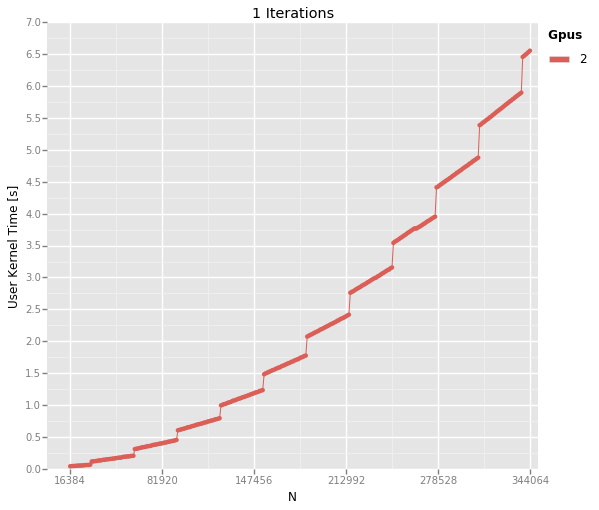

<ggplot: (8751583460641)>

In [19]:
xn = [i*1024 for i in range(16,720,64)]
p = ggplot(aes(x="N", y="usr_kernel_time", color="gpus"), data=df_creek) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("User Kernel Time [s]") +\
xlim(0, 350000) + ylim(0, 7) + ggtitle("1 Iterations") +\
scale_x_continuous(breaks=xn)
p

In [20]:
df_creek = pd.read_csv("../creek_n_body_T1_fnopu_2016-08-16.csv")
df_creek = df_creek.groupby(["gpus", "N"]).mean()
df_creek = df_creek.reset_index()
df_creek["dep_res_time"] = df_creek[["dep_res_creation_time", "dep_res_copy_time", "gpus"]].apply(lambda x : 0 if x[2] == 1 else x[0] + x[1], axis=1)
df_creek["ratio_depres_usrkernel"] = df_creek[["dep_res_time", "usr_kernel_time"]].apply(lambda x : x[0] / x[1], axis=1)
df_creek["ratio_depres_copy"] = df_creek[["dep_res_time", "dep_res_copy_time"]].apply(lambda x : x[1] / x[0], axis=1)
df_creek["total_time"] = df_creek[["usr_htod_memcpy_time", "usr_kernel_time", "usr_dtoh_memcpy_time"]].apply(lambda x : x[0] + x[1] + x[2], axis=1)
df_creek["kernel-depres"] = df_creek[["dep_res_time", "usr_kernel_time"]].apply(lambda x : x[1] - x[0], axis=1)
df_creek["rel_dep_res_creation_time"] = df_creek[["dep_res_time", "dep_res_creation_time"]].apply(lambda x : x[1] / x[0], axis=1)

df_creek["total_speedup"] = df_creek.loc[:,["N", "total_time"]].apply(lambda x: df_creek[df_creek.gpus == 1][df_creek.N == x[0]].loc[:,["total_time"]].iloc[0,0] / x[1] if not df_creek[df_creek.gpus == 1][df_creek.N == x[0]].loc[:,["total_time"]].empty else np.NaN, axis=1)
df_creek["kernel_speedup"] = df_creek.loc[:,["N", "usr_kernel_time"]].apply(lambda x: df_creek[df_creek.gpus == 1][df_creek.N == x[0]].loc[:,["usr_kernel_time"]].iloc[0,0] / x[1] if not df_creek[df_creek.gpus == 1][df_creek.N == x[0]].loc[:,["total_time"]].empty else np.NaN, axis=1)

df_creek.head()

,gpus,N,T,usr_htod_memcpy_time,usr_dtoh_memcpy_time,usr_kernel_time,dep_res_creation_time,dep_res_copy_time,arg_acc_time,lin_time,dep_res_time,ratio_depres_usrkernel,ratio_depres_copy,total_time,kernel-depres,rel_dep_res_creation_time,total_speedup,kernel_speedup
0,1,16384,1,0.000374,0.000255,0.054072,NaN,NaN,NaN,NaN,0,0,NaN,0.054701,0.054072,NaN,1,1
1,1,17408,1,0.000359,0.000283,0.057420,NaN,NaN,NaN,NaN,0,0,NaN,0.058061,0.057420,NaN,1,1
2,1,18432,1,0.000398,0.000314,0.060788,NaN,NaN,NaN,NaN,0,0,NaN,0.061499,0.060788,NaN,1,1
3,1,19456,1,0.000336,0.000268,0.064173,NaN,NaN,NaN,NaN,0,0,NaN,0.064777,0.064173,NaN,1,1
4,1,20480,1,0.000413,0.000303,0.067754,NaN,NaN,NaN,NaN,0,0,NaN,0.068470,0.067754,NaN,1,1


In [21]:
creek_part = df_creek.loc[:,["gpus","N","usr_kernel_time"]]
creek_part["node"] = "creek"
creek_part.head()

,gpus,N,usr_kernel_time,node
0,1,16384,0.054072,creek
1,1,17408,0.057420,creek
2,1,18432,0.060788,creek
3,1,19456,0.064173,creek
4,1,20480,0.067754,creek


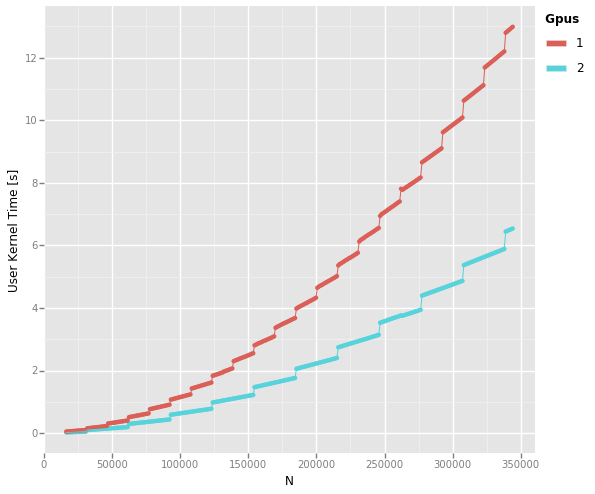

<ggplot: (8751586278037)>

In [22]:
xn = [i*1024 for i in range(16,720,1)]
p = ggplot(aes(x="N", y="usr_kernel_time", color="gpus"), data=df_creek) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("User Kernel Time [s]") #+\
#xlim(70000, 80000) + ylim(0, 1) + ggtitle("1 Iterations, no position update") +\
#scale_x_continuous(breaks=xn)
p

# Home PC

In [23]:
df_home = pd.read_csv("../homepc_n_body_T1_fnopu_2016-08-17.csv")
df_home = df_home.groupby(["gpus", "N","blocksize"]).mean()
df_home = df_home.reset_index()
df_home.head()

,gpus,N,blocksize,T,usr_htod_memcpy_time,usr_dtoh_memcpy_time,usr_kernel_time,dep_res_creation_time,dep_res_copy_time,arg_acc_time,lin_time
0,1,61440,128,1,0.000911,0.000733,0.341703,NaN,NaN,NaN,NaN
1,1,61440,256,1,0.000721,0.000738,0.392722,NaN,NaN,NaN,NaN
2,1,61440,384,1,0.000743,0.000701,0.434783,NaN,NaN,NaN,NaN
3,1,61440,512,1,0.000955,0.000819,0.376413,NaN,NaN,NaN,NaN
4,1,61440,640,1,0.000758,0.000712,0.445263,NaN,NaN,NaN,NaN


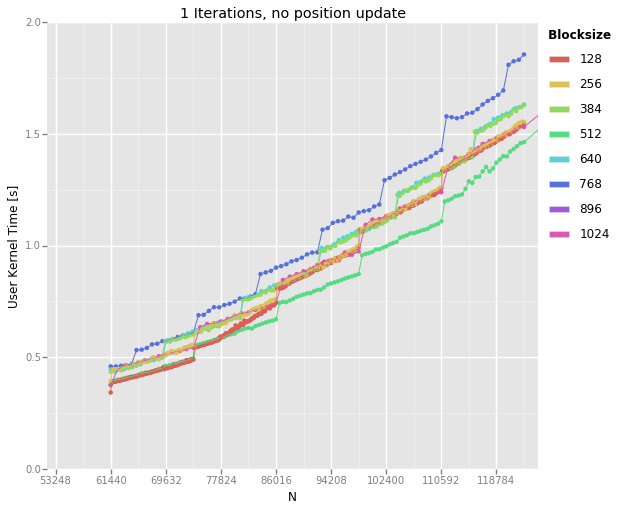

<ggplot: (8751583677813)>

In [24]:
xn = [i*1024 for i in range(12,720, 8)]
p = ggplot(aes(x="N", y="usr_kernel_time", color="blocksize"), data=df_home) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("User Kernel Time [s]") +\
xlim(52000, 125000) + ylim(0, 2) + ggtitle("1 Iterations, no position update") +\
scale_x_continuous(breaks=xn)
p

In [25]:
home_part = df_home.loc[:,["gpus","N","usr_kernel_time"]]
home_part["node"] = df_home.loc[:,["blocksize"]].apply(lambda x : "homepc" + str(x[0]), axis=1)
home_part.head()
mixed = pd.concat([home_part, creek_part[creek_part.gpus == 1]], axis=0)

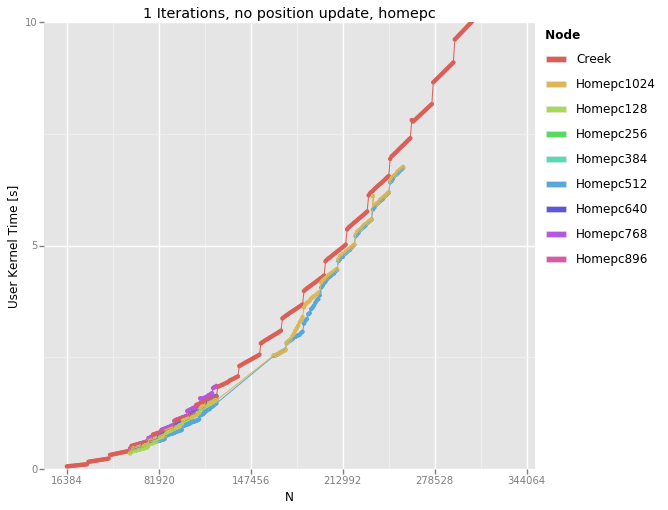

<ggplot: (8751583294425)>

In [26]:
xn = [i*1024 for i in range(16,720,64)]
p = ggplot(aes(x="N", y="usr_kernel_time", color="node"), data=mixed) +\
geom_point(size=20) + geom_line() +\
scale_color_gradient(low="red", high="blue") + ylab("User Kernel Time [s]") +\
xlim(0, 350000) + ylim(0, 10) + ggtitle("1 Iterations, no position update, homepc") +\
scale_x_continuous(breaks=xn)
p

#p = ggplot(aes(x="N", y="usr_kernel_time"), data=mixed) +\
#geom_point(size=20) + geom_line() + facet_wrap("node", ncol=2)
#p.draw()
#fig = plt.gcf()
#fig = fig.set_size_inches(14,8)
#plt.show()

## Occupancy Analysis


(array([48]),)
f(N=86016) = 0.669771 s
f(N=86528) = 0.743054 s
168 / 24 = 7
f(N=86016)/(168/24) = 0.0956815714286
f(N=86528)-f(N=86016) = 0.073283


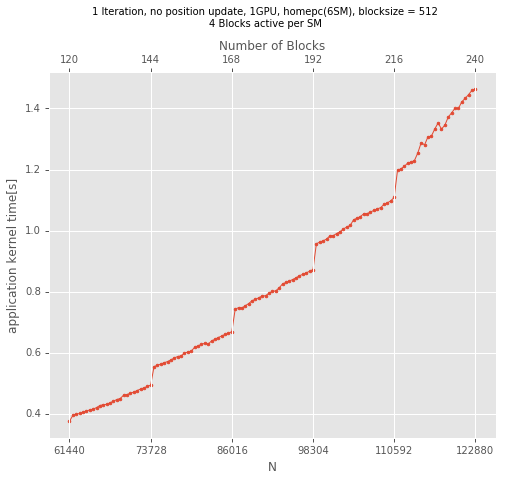

In [27]:
xn = [i*512 for i in range(120,122880/512 + 1, 24)]
#p = ggplot(aes(x="N", y="usr_kernel_time"), data=df_home[df_home.blocksize == 512]) +\
#geom_point(size=20) + geom_line() +\
#ylab("User Kernel Time [s]") +\
#xlim(52000, 130000) + ylim(0, 2) + ggtitle("1 Iterations, no position update, 1GPU, homepc(6SM)") +\
#scale_x_continuous(breaks=xn)
#p

plt.style.use("ggplot")

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
tmp_df = df_home[(df_home.blocksize == 512) & (df_home.N < 150000)]
xs = tmp_df["N"].values
ys = tmp_df["usr_kernel_time"].values
ax.plot(xs, ys, marker='.', ms=5, lw=1)

#ax.get_xaxis().set_ticks_position("bottom")
ax.get_yaxis().set_ticks_position("left")
ax.get_xaxis
#ax.set_xlim(0, 17)
#ax.set_ylim(0, 4.5)
ax.set_xlabel("N")
ax.set_ylabel("application kernel time[s]")
ax.set_xticks(xn)
fig.suptitle("1 Iteration, no position update, 1GPU, homepc(6SM), blocksize = 512\n4 Blocks active per SM")
twin = ax.twiny()
twin.set_xlim(ax.get_xlim())
twin.set_xticks(xn)
twin.set_xticklabels(np.array(xn)/512)
twin.set_xlabel("Number of Blocks")
fig.subplots_adjust(top=0.85)
print np.where(xs == 86016)
print "f(N=86016) =", ys[48], "s"
print "f(N=86528) =", ys[49], "s"
print "168 / 24 =", 168/24
print "f(N=86016)/(168/24) =", ys[48]/(168./24)
print "f(N=86528)-f(N=86016) =", ys[49] - ys[48]

# Same on Victoria

In [7]:
df_v = pd.read_csv("../victoria_n_body_small_2016-08-26.csv")
df_v = df_v.groupby(["gpus", "N","blocksize"]).mean()
df_v = df_v.reset_index()
df_v[(df_v.gpus == 1) & (df_v.N > 140000)].head(30)

,gpus,N,blocksize,T,usr_htod_memcpy_time,usr_dtoh_memcpy_time,usr_kernel_time,dep_res_creation_time,dep_res_copy_time,arg_acc_time,lin_time
77,1,140288,1024,1,0.002333,0.001273,1.372757,NaN,NaN,NaN,NaN
78,1,141312,1024,1,0.003554,0.001380,1.380790,NaN,NaN,NaN,NaN
79,1,142336,1024,1,0.003463,0.001187,1.399893,NaN,NaN,NaN,NaN
80,1,143360,1024,1,0.003218,0.001286,1.402853,NaN,NaN,NaN,NaN
81,1,144384,1024,1,0.003778,0.001384,1.426177,NaN,NaN,NaN,NaN
82,1,145408,1024,1,0.003328,0.001327,1.433467,NaN,NaN,NaN,NaN
83,1,146432,1024,1,0.002367,0.001244,1.446033,NaN,NaN,NaN,NaN
84,1,147456,1024,1,0.002790,0.001238,1.453807,NaN,NaN,NaN,NaN
85,1,147457,1024,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,1,148480,1024,1,0.003122,0.001379,1.471317,NaN,NaN,NaN,NaN


169984
169984
[79872, 93184, 106496, 119808, 133120, 146432, 159744]
N start = 61440
N end = 169984


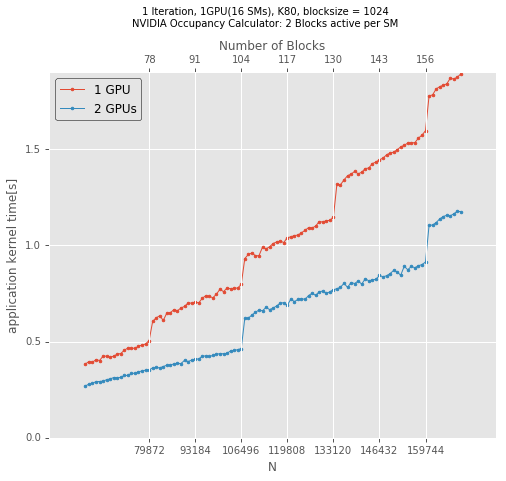

In [10]:
xn = [i for i in range(78*1024,169984, 1024*13)]

plt.style.use("ggplot")

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
tmp_df = df_v[(df_v.gpus == 1) & (df_v.N % 1024 == 0)]
xs = tmp_df["N"].values
print max(tmp_df["N"].values)
ys = tmp_df["usr_kernel_time"].values
ax.plot(xs, ys, marker='.', ms=5, lw=1,label="1 GPU")
tmp_df = df_v[df_v.gpus == 2]
xs = tmp_df["N"].values
print max(xs)
ys = tmp_df["usr_kernel_time"].values
ax.plot(xs, ys, marker='.', ms=5, lw=1,label="2 GPUs")
ax.legend(loc=2)

#ax.get_xaxis().set_ticks_position("bottom")
ax.get_yaxis().set_ticks_position("left")
ax.get_xaxis
ax.set_xlim(51000, 180000)
ax.set_ylim(0, 1.9)
ax.set_xlabel("N")
ax.set_ylabel("application kernel time[s]")
ax.set_xticks(xn)
print xn
fig.suptitle("1 Iteration, 1GPU(16 SMs), K80, blocksize = 1024\nNVIDIA Occupancy Calculator: 2 Blocks active per SM")
twin = ax.twiny()
twin.set_xlim(ax.get_xlim())
twin.set_xticks(xn)
twin.set_xticklabels(np.array(xn)/1024)
twin.set_xlabel("Number of Blocks")
fig.subplots_adjust(top=0.85)
print "N start =", min(xs)
print "N end =", max(xs)

## Without Position Update

In [3]:
df_v = pd.read_csv("../victoria_n_body_small_fnpu_2016-08-29.csv")
df_v = df_v.groupby(["gpus", "N","blocksize"]).mean()
df_v = df_v.reset_index()
df_v[(df_v.gpus == 1) & (df_v.N > 140000)].head(30)

,gpus,N,blocksize,T,usr_htod_memcpy_time,usr_dtoh_memcpy_time,usr_kernel_time,dep_res_creation_time,dep_res_copy_time,arg_acc_time,lin_time
77,1,140288,1024,1,0.002788,0.001388,1.372307,NaN,NaN,NaN,NaN
78,1,141312,1024,1,0.003787,0.001349,1.399167,NaN,NaN,NaN,NaN
79,1,142336,1024,1,0.003003,0.001111,1.410197,NaN,NaN,NaN,NaN
80,1,143360,1024,1,0.003552,0.001300,1.430323,NaN,NaN,NaN,NaN
81,1,144384,1024,1,0.003748,0.001399,1.433007,NaN,NaN,NaN,NaN
82,1,145408,1024,1,0.003593,0.001299,1.442590,NaN,NaN,NaN,NaN
83,1,146432,1024,1,0.002503,0.001298,1.453190,NaN,NaN,NaN,NaN
84,1,147456,1024,1,0.003830,0.001413,1.467970,NaN,NaN,NaN,NaN
85,1,148480,1024,1,0.003299,0.001358,1.471843,NaN,NaN,NaN,NaN
86,1,149504,1024,1,0.003674,0.001272,1.479827,NaN,NaN,NaN,NaN


169984
[79872, 93184, 106496, 119808, 133120, 146432, 159744]
N start = 61440
N end = 169984


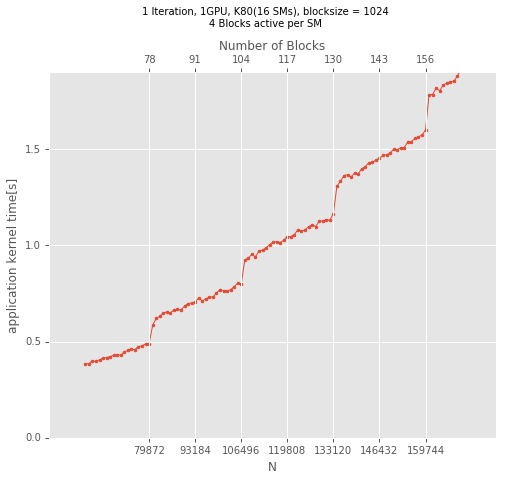

In [5]:
xn = [i for i in range(78*1024,169984, 1024*13)]

plt.style.use("ggplot")

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
tmp_df = df_v[(df_v.gpus == 1) & (df_v.N % 1024 == 0)]
xs = tmp_df["N"].values
print max(tmp_df["N"].values)
ys = tmp_df["usr_kernel_time"].values
ax.plot(xs, ys, marker='.', ms=5, lw=1)
#tmp_df = df_v[df_v.gpus == 2]
#xs = tmp_df["N"].values
#print max(xs)
#ys = tmp_df["usr_kernel_time"].values
#ax.plot(xs, ys, marker='.', ms=5, lw=1)

#ax.get_xaxis().set_ticks_position("bottom")
ax.get_yaxis().set_ticks_position("left")
ax.get_xaxis
ax.set_xlim(51000, 180000)
ax.set_ylim(0, 1.9)
ax.set_xlabel("N")
ax.set_ylabel("application kernel time[s]")
ax.set_xticks(xn)
print xn
fig.suptitle("1 Iteration, 1GPU, K80(16 SMs), blocksize = 1024\n4 Blocks active per SM")
twin = ax.twiny()
twin.set_xlim(ax.get_xlim())
twin.set_xticks(xn)
twin.set_xticklabels(np.array(xn)/1024)
twin.set_xlabel("Number of Blocks")
fig.subplots_adjust(top=0.85)
print "N start =", min(xs)
print "N end =", max(xs)